In [5]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history=autoencoder.fit(x_train, x_train,
                epochs=8,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6954 - accuracy: 9.4895e-04 - val_loss: 0.6953 - val_accuracy: 7.0000e-04
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6952 - accuracy: 0.0012 - val_loss: 0.6951 - val_accuracy: 7.0000e-04
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6951 - accuracy: 0.0013 - val_loss: 0.6950 - val_accuracy: 7.0000e-04
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6949 - accuracy: 0.0013 - val_loss: 0.6948 - val_accuracy: 7.0000e-04
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6948 - accuracy: 0.0011 - val_loss: 0.6947 - val_accuracy: 8.0000e-04
Epoch 6/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6946 - accuracy: 0.0013 - val_loss: 0.6945 - val_accuracy: 9.0000e-04
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6945 - accuracy: 0.0013 - val_loss: 0

In [11]:
# 1. Add more hidden layer to autoencoder

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded_1 = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(2*encoding_dim, activation='relu')(encoded_1)
decoded_1 = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder_1 = Model(input_img, decoded_1)
# this model maps an input to its encoded representation
autoencoder_1.compile(optimizer='adadelta', loss='binary_crossentropy', metrics = ['accuracy'])

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


history_1=autoencoder_1.fit(x_train, x_train,
                epochs=8,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))



Epoch 1/8
235/235 [==============================] - 3s 13ms/step - loss: 0.6932 - accuracy: 7.0818e-04 - val_loss: 0.6932 - val_accuracy: 0.0010
Epoch 2/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - accuracy: 5.8679e-04 - val_loss: 0.6932 - val_accuracy: 0.0010
Epoch 3/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6931 - accuracy: 6.4274e-04 - val_loss: 0.6931 - val_accuracy: 0.0010
Epoch 4/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6931 - accuracy: 5.9796e-04 - val_loss: 0.6931 - val_accuracy: 0.0010
Epoch 5/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - accuracy: 7.1288e-04 - val_loss: 0.6930 - val_accuracy: 0.0010
Epoch 6/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - accuracy: 6.1133e-04 - val_loss: 0.6930 - val_accuracy: 0.0010
Epoch 7/8
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - accuracy: 6.8823e-04 - val_loss: 0.6929 -

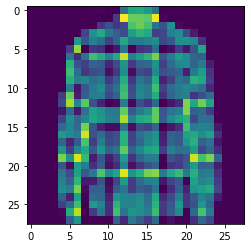

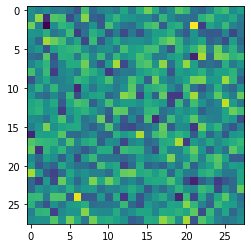

In [20]:
#2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data. 
#Also, visualize the same test data before reconstruction using Matplotlib
prediction = autoencoder_1.predict(x_test[[0],:])

from matplotlib import pyplot as plt
plt.imshow(x_test[7].reshape(28,28))
plt.show()

plt.imshow(prediction[0].reshape(28,28))
plt.show()

Epoch 1/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6933 - accuracy: 9.0000e-04 - val_loss: 0.6933 - val_accuracy: 0.0012
Epoch 2/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - accuracy: 8.8333e-04 - val_loss: 0.6932 - val_accuracy: 0.0012
Epoch 3/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - accuracy: 8.6667e-04 - val_loss: 0.6931 - val_accuracy: 0.0013
Epoch 4/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6931 - accuracy: 8.6667e-04 - val_loss: 0.6930 - val_accuracy: 0.0013
Epoch 5/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - accuracy: 8.5000e-04 - val_loss: 0.6930 - val_accuracy: 0.0014
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6930 - accuracy: 8.5000e-04 - val_loss: 0.6929 - val_accuracy: 0.0013
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6929 - accuracy: 8.5000e-04 - val_loss: 0

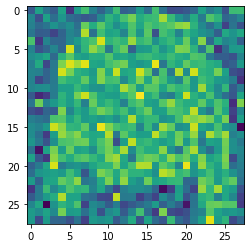

In [21]:
#3. Repeat the question 2 on the denoisening autoencoder
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


history_2=autoencoder_1.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[7].reshape(28,28))
plt.show()

prediction_1 = autoencoder_1.predict(x_train_noisy[[0],:])

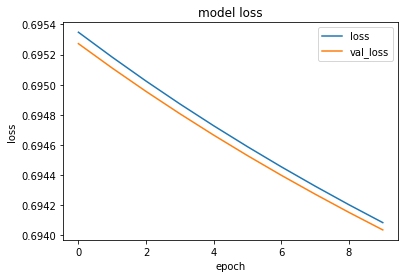

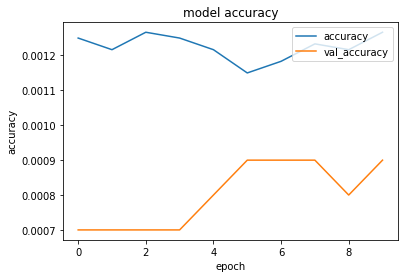

In [10]:
#4. plot loss and accuracy using the history object
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'], loc='upper right')
plt.show()